# Machine Learning in Python
#### by: Chenshu Liu
Reference link: https://youtu.be/rLOyrWV8gmA?list=PLGenESRtZKmFRJ7ZLXbhQRygnRwQOolXi

## Table of Contents
1. [KNN](#KNN)
2. [Linear Regression](#Linear-Regression)
3. [Logistic Regression](#Logistic-Regression)
4. [Regression Refactoring](#Regression-Refactoring)
5. [Naive Bayes](#Naive-Bayes)
6. [Perceptron](#Perceptron)
7. [SVM](#SVM)
8. [Decision Tree](#Decision-Tree)
9. [Random Forest](#Random-Forest)
10. [PCA](#PCA)
11. [K-Means](#K\-Means)
12. [AdaBoost](#AdaBoost)
13. [LDA](#LDA)

## Libraries

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from collections import Counter
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

## KNN
> KNN is the abreviation of K Nearest Neighbors. 

The process of determining the classification of the sample is find `k` (_defined by user_) nearest neighbors of the sample point (**e.g. the green point**) and calculate the euclidean distance of the neighbor points (**the blue and orange points**) from the sample points. 

Since we already know the categories that the neighbor points belong to, we can use the majority of the neighbor category as the classification for the sample point (_e.g. in the case of the image shown below, since two of the three points are blue, the sample point, i.e. the green point, is classified as blue_).

![K-Nearest Neighbor](Images/KNN.jpeg)

In [17]:
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 1234)
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum(x1 - x2)**2)

class KNN:
    def __init__(self, k = 3):
        assert (k >= 1) & (type(k) == int), f"k value {k} is invalid"
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    # to predict sample cases
    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)
        
    def _predict(self, x):
        # compute the distances
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # get k nearest samples and labels
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # majority vote --> most common class label
        # the Counter function returns a tuple(value, # of occurrence)
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]
    
clf = KNN(k = 3)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy = np.sum(predictions == y_test) / len(y_test)
print(f"The prediction accuracy is {accuracy}.")

The prediction accuracy is 0.9333333333333333.


## Linear Regression

>Linear regression is used to predict continuous values using the approximation formula $\hat{y} = wx + b$<br>

To find the optimal values of the weight w and intercept b, we introduce MSE to evaluate the error of prediction for some w and b. MSE is calculated as follows:
$$MSE = J(w, b) = \frac{1}{N}\Sigma_{i=1}^n(y_i - (wx_i + b))^2$$
Then, we use **gradient descent** to find the optimal set of $(w, b)$ that minimizes the partial derivates of MSE:
$$J'(w, b) = \begin{bmatrix} \frac{\partial f}{\partial w} \\ \frac{\partial f}{\partial b} \end{bmatrix} = \begin{bmatrix} \frac{1}{N}\Sigma -2x_i(y_i - (wx_i + b))\\ \frac{1}{N}\Sigma -2(y_i - (wx_i + b))\end{bmatrix}
$$
Gradient descent is an iterative process that iterates the calculation until the local minimum is reached. In this case, since we have two parameters $(w, b)$, we are conducting gradient descent in a two-dimensional space.<br>
After every iteration, we will update the parameters in the following way:
$$w = w - \alpha \cdot dw$$
$$b = b - \alpha \cdot db$$

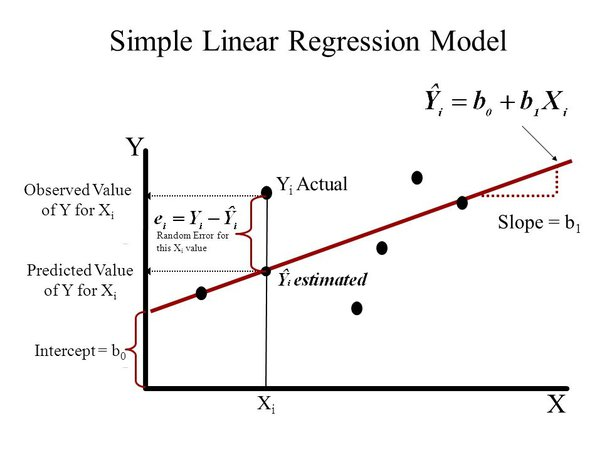

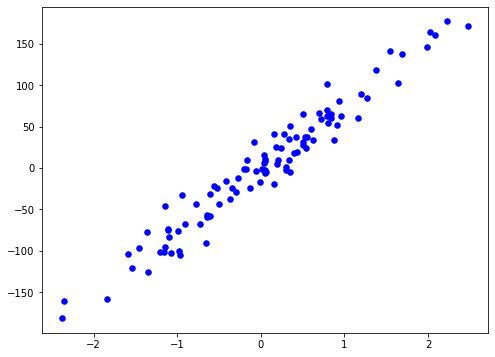

The prediction accuracy, according to MSE, is 305.7719958301902


In [11]:
# data generation
X, y = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

fig = plt.figure(figsize = (8, 6))
plt.scatter(X[:, 0], y, color = 'b', marker = 'o', s = 30)
plt.show()

class LinearRegression:
    # lr stands for learning rate
    # n_iters stands for number of iterations
    def __init__(self, lr = 0.001, n_iters = 1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        # initialization of parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    
    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted
    
regressor = LinearRegression(lr = 0.01)
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)
def MSE(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)
print(f"The prediction accuracy, according to MSE, is {MSE(y_test, predicted)}")

## Logistic Regression

> Logistic regression is a binary classification algorithm

In linear regression, we model the behavior of the data using linear function to predict continuous values. In logistic regression, we want to predict binary outcomes, thus we will use a sigmoid function $s(x) = \frac{1}{1 + e^{-x}}$. And, for the prediction, we have $\hat{y} = h_{\theta}(x) = \frac{1}{1 + e^{-wx+b}}$. Similar to the process of finding optimal parameters for linear regression function, we also use gradient descent to find the best set of values for $(w, b)$ that provides the best prediction performance. The cost function (cross entropy) is:
$$J(w, b) = J(\theta) = \frac{1}{N}\Sigma_{i=1}^n[y^ilog(h_{\theta}(x^i) + (1-y^i)log(1 - h_{\theta}(x^i))]$$

**The gradient descent procedure is the same as those from the linear regression section.**

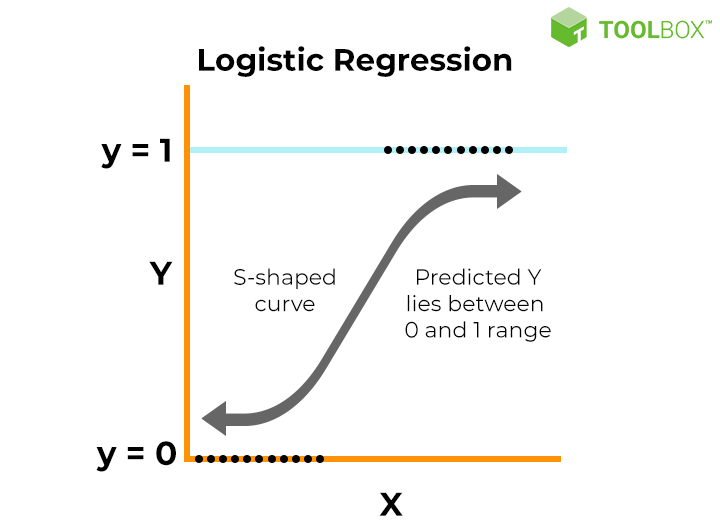

In [13]:
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

class LogisticRegression:
    def __init__(self, lr = 0.001, n_iters = 1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        # initialize parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # gradient descent
        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)
            dw = 1/n_samples * np.dot(X.T, (y_predicted - y))
            db = 1/n_samples * np.sum(y_predicted - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return y_predicted_cls
        
    # helper method for finding sigmoid prediction
    def _sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

regressor = LogisticRegression(lr = 0.0001, n_iters = 1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

print(f"The prediction accuracy is {accuracy(y_test, predictions)}")

The prediction accuracy is 0.9298245614035088


## Regression Refactoring

## Naive Bayes

## Perceptron

## SVM

## Decision Tree

## Random Forest

## PCA

## K-Means

## AdaBoost

## LDA